In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_forget import ds2s_OV_forget
from lib.funcs import *

In [2]:
def forget_exp(n_: int, a: np.float64, b: np.float64) -> np.float64:
	return a * np.exp(-1.0 * b * n_)

def forget_linear(n_: int, a: np.float64, b: np.float64) -> np.float64:
	return a - b * n_

In [3]:
L = 10.0
K = 19
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 0.1
x_min = 0.1
x_init = np.array([L/K * i for i in range(K)], dtype=np.float64)
n_max = 2105

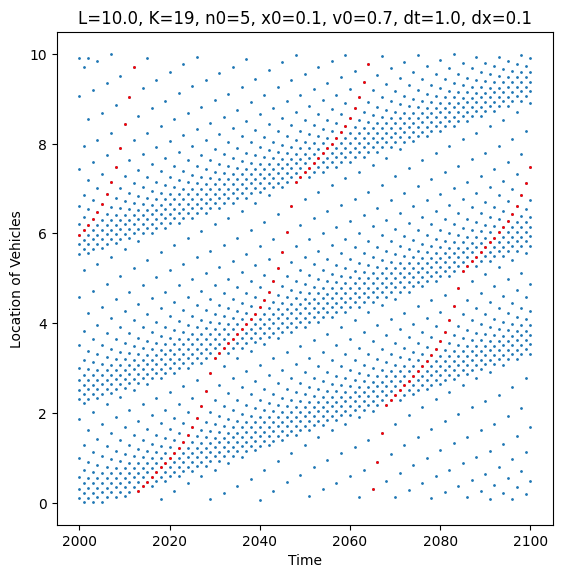

In [4]:
model = ds2s_OV_forget(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_min=x_min,
	forget=np.array([1.0 for i in range(n_0 + 1)], dtype=np.float64),
	x_init=x_init,
	n_max=n_max
)
model.simulate()
plot_pattern(model, 2000, 2100)

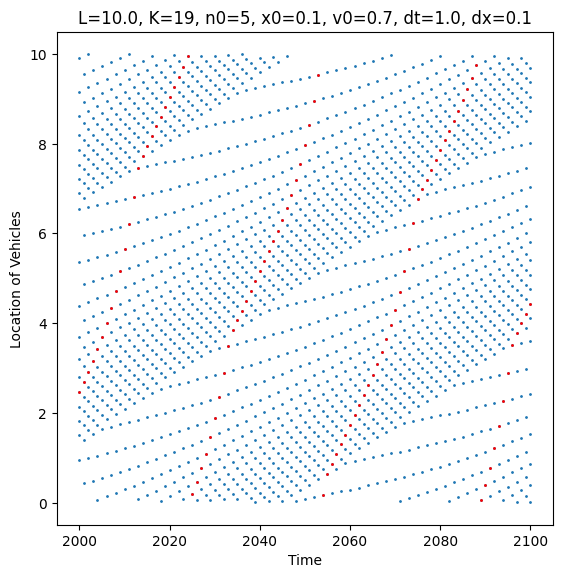

In [5]:
model = ds2s_OV_forget(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_min=x_min,
	forget=np.array([forget_exp(n_, 1.0, 0.1) for n_ in range(n_0 + 1)], dtype=np.float64),
	x_init=x_init,
	n_max=n_max
)
model.simulate()
plot_pattern(model, 2000, 2100)

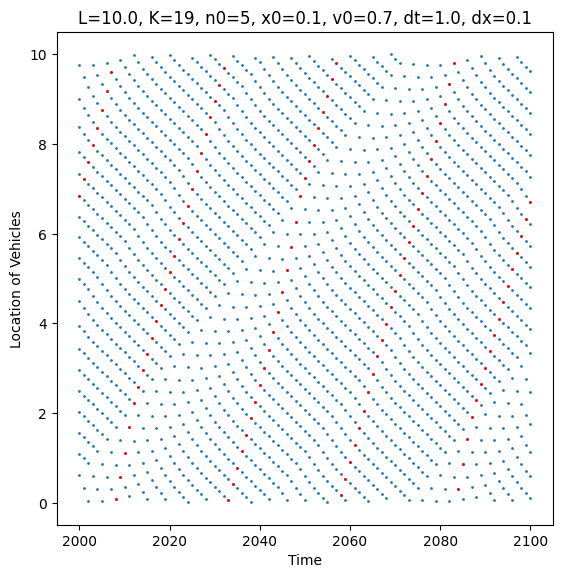

In [6]:
model = ds2s_OV_forget(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_min=x_min,
	forget=np.array([forget_exp(n_, 1.0, 0.15) for n_ in range(n_0 + 1)], dtype=np.float64),
	x_init=x_init,
	n_max=n_max
)
model.simulate()
plot_pattern(model, 2000, 2100)

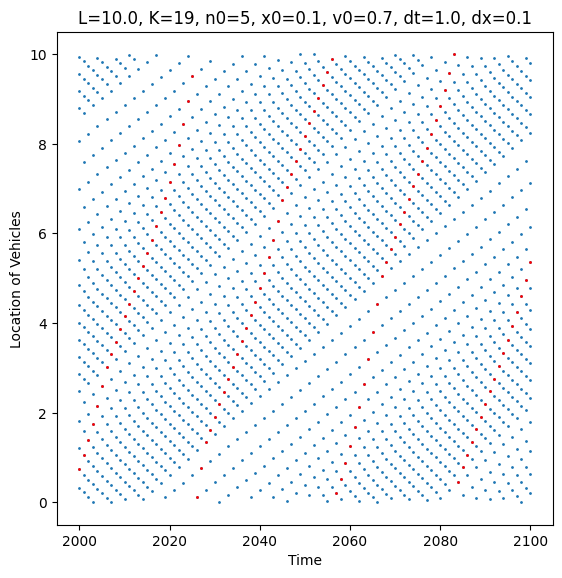

In [7]:
model = ds2s_OV_forget(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_min=x_min,
	forget=np.array([forget_linear(n_, 1.0, 0.1) for n_ in range(n_0 + 1)], dtype=np.float64),
	x_init=x_init,
	n_max=n_max
)
model.simulate()
plot_pattern(model, 2000, 2100)

In [8]:
data = {}
for id, K in enumerate(range(1, int(L/x_min)+1)):
	x_init = np.array([10.0/K * i for i in range(K)], dtype=np.float64)
	model = ds2s_OV_forget(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_min=x_min,
		forget=np.array([forget_exp(n_, 1.0, 0.1) for n_ in range(n_0 + 1)], dtype=np.float64),
		x_init=x_init,
		n_max=2105,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "2000 2100": model.flow(2000, 2100) }
	data[id] = js

In [9]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["2000 2100"] for js in data.values()]

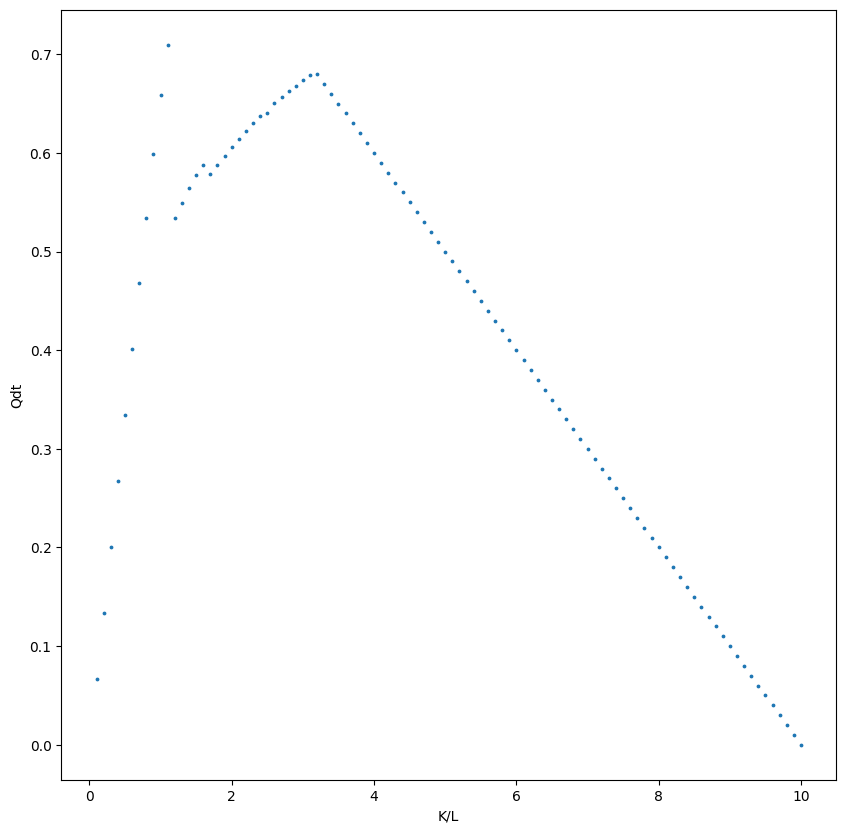

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("K/L")
ax.set_ylabel("Qdt")
density = [js["density"] for js in data.values()]
flow = [js["flow"]["2000 2100"] for js in data.values()]
ax.scatter(density, flow, s=3)
plt.show()